In [1]:
# Import all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from sklearn.preprocessing import StandardScaler

%matplotlib inline

# Functions Set

In [2]:
def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000, a_init=np.array([-10.0, -10.0]).reshape(2, 1)):
    """Batch gradient descent solution."""
    
    # Random initialization of parameters.
    a = a_init
    
    # Create vector for parameter history.
    a_hist = np.zeros((2, n_iterations+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_iterations+1)

    Jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

    # Batch gradient-descent loop.
    iteration = 0
    error = 1
    grad_hist = np.zeros((2, n_iterations))
    while iteration < n_iterations and error > 0.00001:
        gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        Jgd[iteration+1] = (1.0/M)*sum(np.power((y - X.dot(a)), 2))
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        iteration = iteration + 1
    return a, Jgd, a_hist, grad_hist, iteration

# Scaling No Features

In [3]:
# Always reset the pseudo random number generator to the same number.
np.random.seed(1012019)

# Define the number of examples.
M = 1000

# Generate target function.
x1 = np.random.uniform(1000, 2000, (M,1))
x2 = np.random.uniform(0, 1, (M,1))

w = np.random.normal(size = (M,1))
y = x1 + x2
# Observable model.
y_noisy = y + w #np.random.randn(M, 1)

# Concatenate both column vectors, x1 and x2.
X = np.c_[x1, x2]

In [4]:
#plt.hist(x1, bins=100, density=True, label='x1')
#plt.legend()
#plt.show()

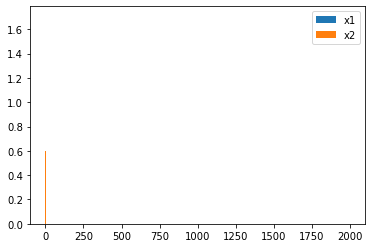

In [5]:
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, label='x2')
plt.legend()
plt.show()

In [6]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-50.0, 54.0, N)
a2 = np.linspace(-50.0, 54.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_noisy - yhat))

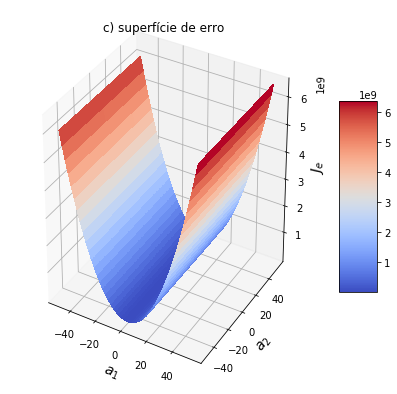

In [7]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('c) superfície de erro')
#Show the plot.
plt.show()

In [8]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y_noisy))

In [9]:
# Number of epochs.
n_iterations = 1000
# Constant learning rate.
alpha = 0.0000002
# Random initialization of parameters.
a_init =  np.array([-10.0, -10.0]).reshape(2, 1)

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(X, y_noisy, alpha, n_iterations, a_init)

In [10]:
print('d) valores óptimos de a')
print(a)

d) valores óptimos de a
[[ 1.00340679]
 [-9.99655299]]


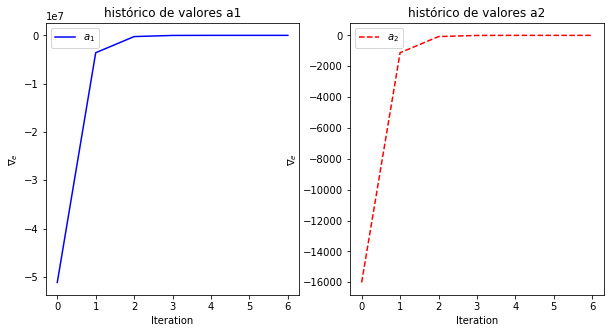

In [11]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\\nabla_e$')
ax1.set_title('histórico de valores a1')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\nabla_e$')
ax2.set_title('histórico de valores a2')
ax2.legend()

#plt.savefig("update_pure_sgd.png", dpi=600)
plt.show()

In [12]:
print('Foram necessárias', iteration, 'épocas para atingir o critério de parada')

Foram necessárias 7 épocas para atingir o critério de parada


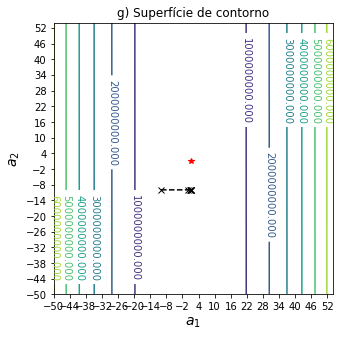

In [13]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('g) Superfície de contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx--')
plt.xticks(np.arange(-50, 54, step=6.0))
plt.yticks(np.arange(-50, 54, step=6.0))
#plt.savefig("error_contour_no_fs_gradient_variation.png", dpi=600)
plt.show()

In [14]:
print('h).i. o algoritmo não converge para a solução encontrada com a equação normal')

h).i. o algoritmo não converge para a solução encontrada com a equação normal


In [15]:
print('h).ii. Ele não converge porque as variáveis não têm a mesma ordem de grandeza')

h).ii. Ele não converge porque as variáveis não têm a mesma ordem de grandeza


In [16]:
print('h).iii. Para que ele convirja é necessário padronizar ou normalizar os atributos antes de aplicar o gradiente descendente')

h).iii. Para que ele convirja é necessário padronizar ou normalizar os atributos antes de aplicar o gradiente descendente


# Padronização

In [17]:
# Instantiate a Standard scaler.
stdScaler = StandardScaler()

# Standardize the features.
scaled_X = stdScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(M,1)
scaled_x2 = scaled_X[:,1].reshape(M,1)

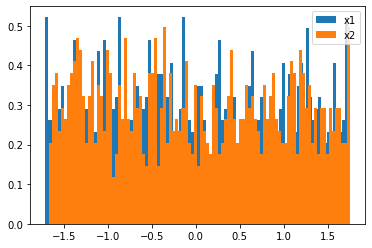

In [18]:
plt.hist(scaled_x1, bins=100, density=True, label='x1')
plt.hist(scaled_x2, bins=100, density=True, label='x2')
plt.legend()
plt.show()

In [19]:
# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(scaled_X).dot(scaled_X)).dot(np.transpose(scaled_X).dot(y))

In [20]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-20.0, 22.0, N)
a2 = np.linspace(-10.0, 32.0, N)

A1, A2 = np.meshgrid(a1, a2)


# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*scaled_x1 + A2[iter1][iter2]*scaled_x2
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y_noisy - yhat))

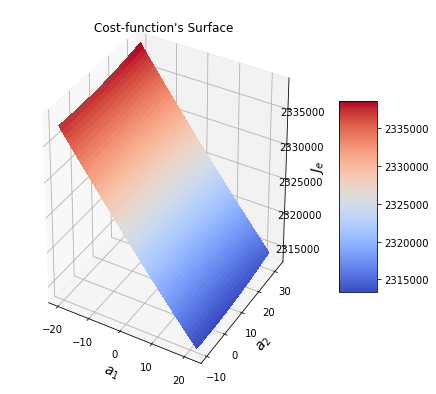

In [21]:
# Plot cost-function surface.
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=14)
ax.set_ylabel('$a_2$', fontsize=14)
ax.set_zlabel('$J_e$', fontsize=14)
plt.title('Cost-function\'s Surface')
plt.savefig("error_surface_fs_gradient_variation.png", dpi=600)
#Show the plot.
plt.show()

In [22]:
# Number of epochs.
n_iterations = 1000
# Constant learning rate.
alpha = 0.5
# Random initialization of parameters.
a_init = np.array([-2.0, -24.0]).reshape(2, 1)

a, Jgd, a_hist, grad_hist, iteration = batchGradientDescent(scaled_X, y_noisy, alpha, n_iterations, a_init)

In [23]:
print('d) valores óptimos de a')
print(a)

d) valores óptimos de a
[[290.25135158]
 [  0.30359525]]


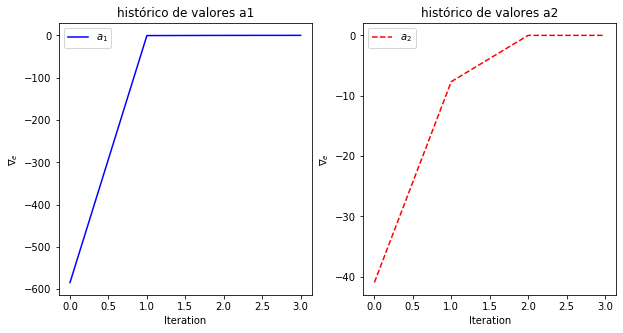

In [24]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(np.arange(0, iteration), grad_hist[0,0:iteration], 'b', label='$a_1$')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\\nabla_e$')
ax1.set_title('histórico de valores a1')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, iteration), grad_hist[1,0:iteration], 'r--', label='$a_2$')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\\nabla_e$')
ax2.set_title('histórico de valores a2')
ax2.legend()

#plt.savefig("update_pure_sgd.png", dpi=600)
plt.show()

In [25]:
print('Foram necessárias', iteration, 'épocas para atingir o critério de parada')

Foram necessárias 4 épocas para atingir o critério de parada


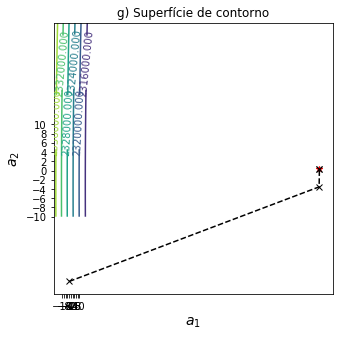

In [26]:
# Plot figure.        
fig = plt.figure(figsize=(5,5))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('g) Superfície de contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*')
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx--')
plt.xticks(np.arange(-10, 12, step=2.0))
plt.yticks(np.arange(-10, 12, step=2.0))
plt.savefig("error_contour_fs_gradient_variation.png", dpi=600)
plt.show()